In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import scipy.signal as signal
import scipy.ndimage as nd


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


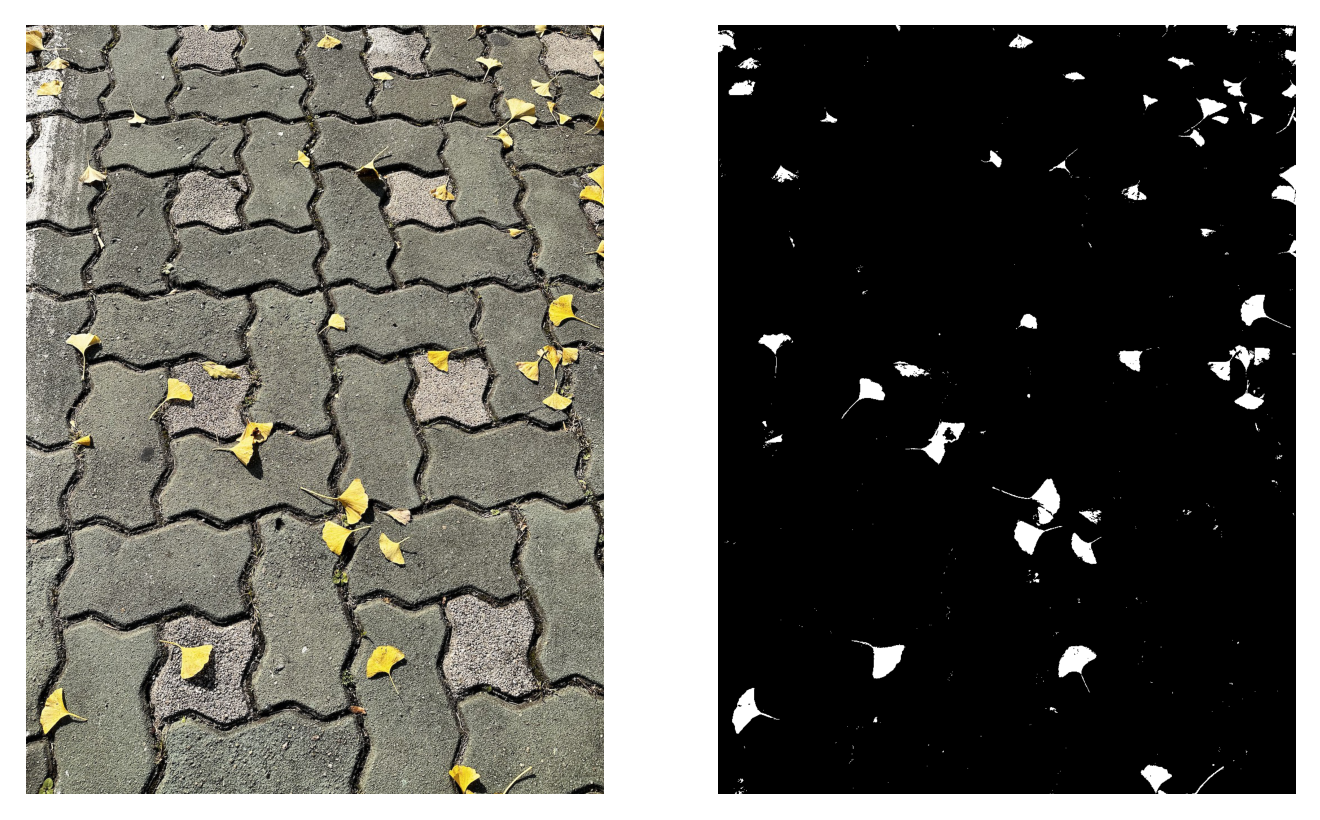

In [38]:
I = Image.open('y.jpeg')
f = np.array(I)
f = f.astype(np.float32) / 255
r = f[:, :, 0]
g = f[:, :, 1]
b = f[:, :, 2]
res = (r+g)/2
temp = res - b*0.6
f2 = temp > 0.45

plt.figure(dpi=256)
plt.subplot(121)
plt.imshow(f)
plt.axis('off')
plt.subplot(122)
plt.imshow(f2,cmap='gray')
plt.axis('off')
plt.show()

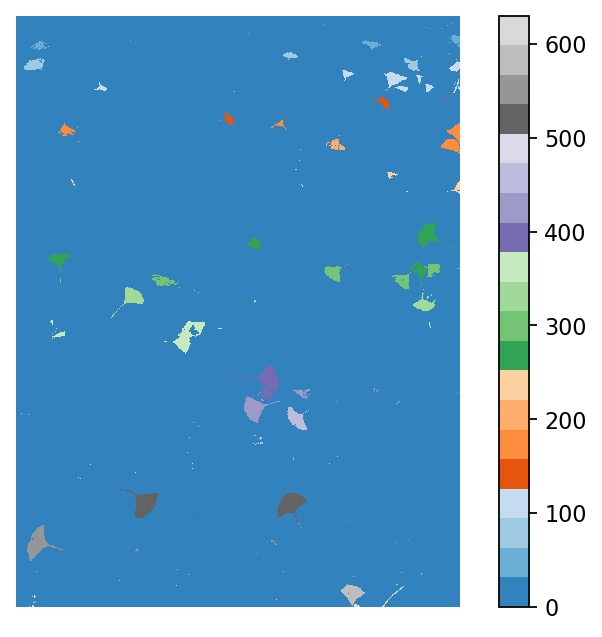

In [39]:
l, m = nd.label(f2)
plt.figure(dpi=160)
plt.imshow(l,interpolation='nearest',cmap='tab20c')
plt.axis('off')
plt.colorbar()
plt.show()

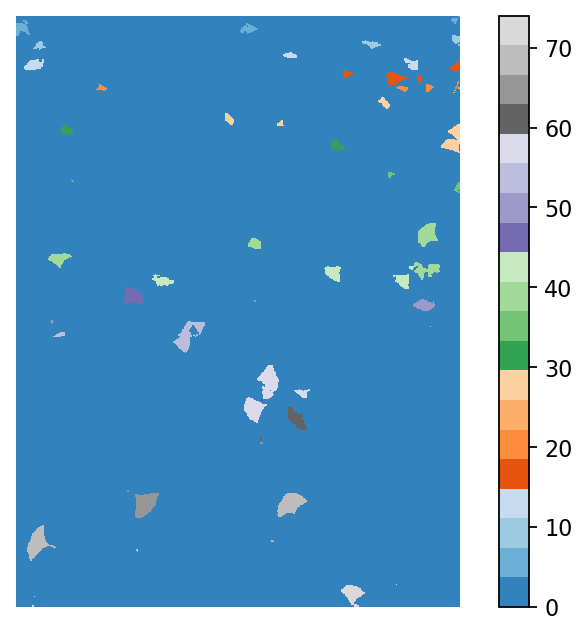

In [55]:
f3 = nd.binary_opening(f2, np.ones((3,3)))
f3 = nd.binary_closing(f3, np.ones((3,3)))
f3 = nd.binary_closing(f3, np.ones((3,3)))
f3 = nd.binary_opening(f3, np.ones((3,3)))
l, m = nd.label(f3)
plt.figure(dpi=160)
plt.imshow(l,interpolation='nearest',cmap='tab20c')
plt.axis('off')
plt.colorbar()
plt.show()

In [56]:
cc = np.zeros((m-1,2))
for i in range(1,m):
  cc[i-1,0] = i
  cc[i-1,1] = np.sum(l==i)
  print(f'index: {int(cc[i-1,0])}, number of pixels: {int(cc[i-1,1])}')

index: 1, number of pixels: 51
index: 2, number of pixels: 26
index: 3, number of pixels: 157
index: 4, number of pixels: 9
index: 5, number of pixels: 141
index: 6, number of pixels: 679
index: 7, number of pixels: 532
index: 8, number of pixels: 296
index: 9, number of pixels: 415
index: 10, number of pixels: 320
index: 11, number of pixels: 9
index: 12, number of pixels: 310
index: 13, number of pixels: 559
index: 14, number of pixels: 824
index: 15, number of pixels: 343
index: 16, number of pixels: 285
index: 17, number of pixels: 927
index: 18, number of pixels: 135
index: 19, number of pixels: 70
index: 20, number of pixels: 214
index: 21, number of pixels: 214
index: 22, number of pixels: 246
index: 23, number of pixels: 12
index: 24, number of pixels: 9
index: 25, number of pixels: 9
index: 26, number of pixels: 397
index: 27, number of pixels: 374
index: 28, number of pixels: 138
index: 29, number of pixels: 1499
index: 30, number of pixels: 477
index: 31, number of pixels: 9

In [57]:
ind_max = np.argmax(cc[:,1])
print(f'the largest component: index {int(ind_max)}, # of pixels: {int(cc[ind_max,1])}')
ind_min = np.argmin(cc[:,1])
print(f'the smallest component: index {int(ind_min)}, # of pixels: {int(cc[ind_min,1])}')

the largest component: index 56, # of pixels: 2359
the smallest component: index 3, # of pixels: 9


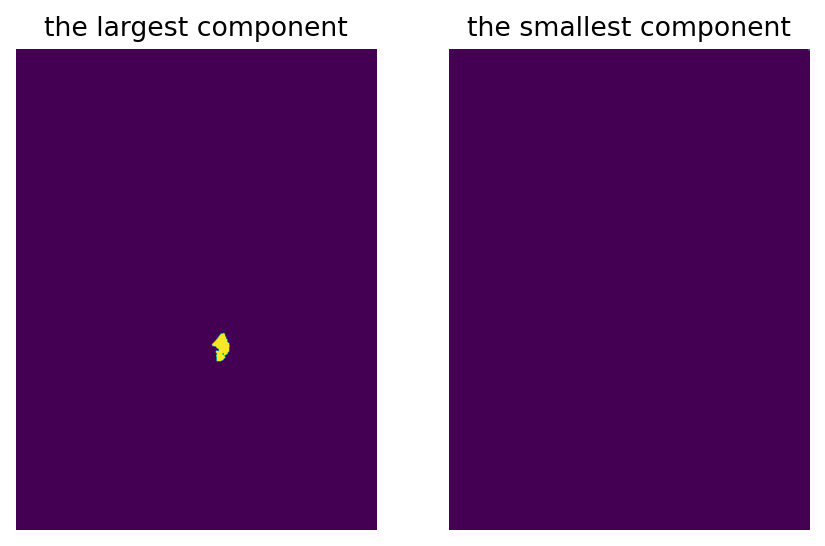

In [58]:
plt.figure(dpi=160)
plt.subplot(121)
plt.imshow(l==cc[ind_max,0])
plt.axis('off')
plt.title('the largest component')
plt.subplot(122)
plt.imshow(l==cc[ind_min,0])
plt.axis('off')
plt.title('the smallest component')
plt.show()